Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

Adapted from the tutorial proposed by the HMeta-d toolbox: https://github.com/metacoglab/HMeta-d/tree/master/CPC_metacog_tutorial

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from metadPy.plotting import plot_confidence
from metadPy.utils import type2_SDT_simuation

sns.set_context("talk")

# What metacognition looks like?

## Simulating ratings

First, we will simulate data with high and low confidence noise, which should lead to higher and lower metacognition. This added noise represents a potential loss of information between type 1 task discrimination and 'metacognitive' information, i.e. type 2 confidence scores. We will then plot what the confidence scores would look like for each of these two scenarios (high and low confidence noise).

In [3]:
# Set up the parameters:
d = 2  # Set task performance (d')
c = 0  # Set task bias (c)
nTrials = 1000  # Set the number of trials performed
nRatings = 4  # Choose the rating scale to use
lowNoise, highNoise = 0, 0.7  # Set values for high and low confidence noise

# Simulate the responses for low and high confidence noise:
lowNoise_nR_S1, lowNoise_nR_S2 = type2_SDT_simuation(
    d=d, noise=lowNoise, c=c, nRatings=nRatings, nTrials=nTrials
)
highNoise_nR_S1, highNoise_nR_S2 = type2_SDT_simuation(
    d=d, noise=highNoise, c=c, nRatings=nRatings, nTrials=nTrials
)

Plot the confidence results for the two simulations:

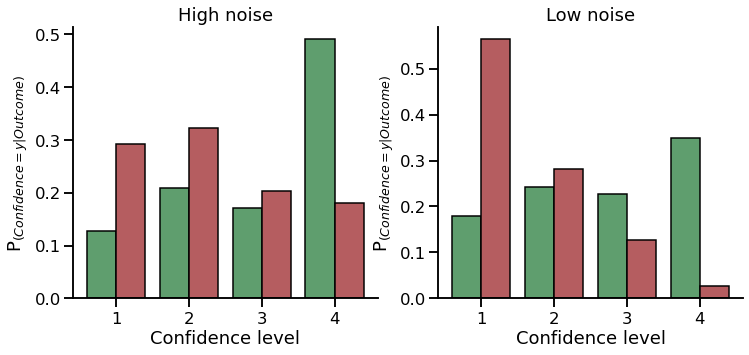

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_confidence(nR_S1=highNoise_nR_S1, nR_S2=highNoise_nR_S2, ax=axs[0])
axs[0].set_title("High noise")
plot_confidence(nR_S1=lowNoise_nR_S1, nR_S2=lowNoise_nR_S2, ax=axs[1])
axs[1].set_title("Low noise")
sns.despine()

**EXPLANATION:** You can see in the figure that the low confidence noise likely results in less overlap between the confidence distributions for correct and incorrect responses. It is actually the difference between these two distributions (one for correct responses, one for incorrect responses) that tells us how good metacognition is --> If you have higher confidence scores when you are correct and lower confidence scores when you are incorrect (and not much mixing between the two), the better metacognition will be. Another way of thinking about it is that the more 'noise' that is added as information passes from type 1 performance (e.g. correct vs incorrect perceptions) to type 2 performance (e.g. confidence in the decision that has been made), the less 'mixing' will occur between these two distributions and the larger (or 'better') metacognition will be.

### EXERCISE 1:
Run the simulation and plot again a few times. Do you get the same results every time? Why / why not?

## How does performance change metacognition?

It is important to note that looking at the difference between the confidence distributions is an 'absolute' form of metacognition, which means that it will be affected by task performance (measured by d'). For example, if d' is higher (and the task is easier), there is more type 1 information on which to base metacognitive decisions than if d' is lower. We will explore this here by comparing the confidence scores with higher and lower d'.

**Set up the parameters**

In [5]:
dHigh = 2  # Set task performance to be higher, with a larger d' value
dLow = 1  # Set task performance to be lower, with a smaller d' value
c = 0  # Set task bias (c)
nTrials = 1000  # Set the number of trials performed
nRatings = 4  # Choose the rating scale to use
noise = 0.2  # Set a value for the noise

**Simulate the responses for low and high task performance**

In [6]:
dHigh_nR_S1, dHigh_nR_S2 = type2_SDT_simuation(
    d=dHigh, noise=noise, c=c, nRatings=nRatings, nTrials=nTrials
)
dLow_nR_S1, dLow_nR_S2 = type2_SDT_simuation(
    d=dLow, noise=noise, c=c, nRatings=nRatings, nTrials=nTrials
)

**Plot the confidence results for the two simulations**

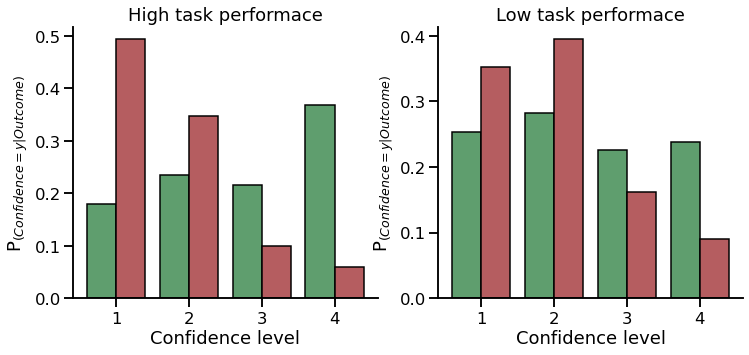

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_confidence(nR_S1=dHigh_nR_S1, nR_S2=dHigh_nR_S2, ax=axs[0])
axs[0].set_title("High task performace")
plot_confidence(nR_S1=dLow_nR_S1, nR_S2=dLow_nR_S2, ax=axs[1])
axs[1].set_title("Low task performace")
sns.despine()

**EXPLANATION:** You can see in this figure that a higher task performance (d') results in a bigger difference between the confidence distributions, despite the same amount of confidence noise. Later on we will look at how we can correct for the level of d' to get a 'relative' measure of metacognition.

**EXERCISE 2:** Change any of the parameters above and re-run this section to get an idea as to how each parameter may change the observed confidence scores.